### Cocktail API
https://www.thecocktaildb.com/api.php

In [140]:
letter = 'm'

In [141]:
import requests

# API endpoint for searching cocktails by name
url = 'https://www.thecocktaildb.com/api/json/v1/1/search.php'

# Query parameters for searching cocktails
params = {
    'f': letter  # The letter to search for
}

all_ingredients = []

# Send a GET request to the API endpoint with the query parameters
response = requests.get(url, params=params)

# Parse the JSON response
data = response.json()

# Check if the request was successful
if response.status_code == 200 and data['drinks'] is not None:
    # Loop through each cocktail in the response
    for cocktail in data['drinks']:
        # Extract the cocktail name and ingredient list
        cocktail_name = cocktail['strDrink']
        ingredient_list = []
        for i in range(1, 16):
            ingredient = cocktail['strIngredient' + str(i)]
            if ingredient:
                ingredient_list.append(ingredient)

        all_ingredients.append(ingredient_list)
        
        # Print the cocktail name and ingredient list
        print('Cocktail Name:', cocktail_name)
        print('Ingredient List:', ', '.join(ingredient_list))
        print('---')
else:
    print('No cocktails found.')

Cocktail Name: Melya
Ingredient List: Espresso, Honey, Cocoa powder
---
Cocktail Name: Mojito
Ingredient List: Light rum, Lime, Sugar, Mint, Soda water
---
Cocktail Name: Mimosa
Ingredient List: Champagne, Orange juice
---
Cocktail Name: Mai Tai
Ingredient List: Light rum, Orgeat syrup, Triple sec, Sweet and sour, Cherry
---
Cocktail Name: Martini
Ingredient List: Gin, Dry Vermouth, Olive
---
Cocktail Name: Michelada
Ingredient List: Beer, Tomato Juice, Lime Juice, Hot Sauce, Worcestershire Sauce, Soy Sauce
---
Cocktail Name: Manhattan
Ingredient List: Sweet Vermouth, Bourbon, Angostura bitters, Ice, Maraschino cherry, Orange peel
---
Cocktail Name: Margarita
Ingredient List: Tequila, Triple sec, Lime juice, Salt
---
Cocktail Name: Mint Julep
Ingredient List: Mint, Bourbon, Powdered sugar, Water
---
Cocktail Name: Mudslinger
Ingredient List: Southern Comfort, Orange juice, Pepsi Cola
---
Cocktail Name: Martinez 2
Ingredient List: Gin, Sweet Vermouth, Maraschino Liqueur, Angostura Bitte

In [142]:
# import itertools
# import networkx as nx
# import matplotlib.pyplot as plt

# # List of ingredients
# # ingredients = all_ingredients[0]
# # ingredients.append('Cherry')
# # print(ingredients)

# # Create a graph object
# G = {}

# # Add all possible combinations of two ingredients as edges in the graph
# for list in all_ingredients:
#     for pair in itertools.combinations(list, 2):
#         ingredient1 = pair[0]
#         ingredient2 = pair[1]
        
#         # Check if ingredient1 is already in the adjacency list
#         if ingredient1 in G:
#             found = False
#             # Check if ingredient2 is already a connected edge in the adjacency list for ingredient1
#             for i in range(len(G[ingredient1])):
#                 if G[ingredient1][i][0] == ingredient2:
#                     # Increment the weight by 1 if the edge is not new
#                     G[ingredient1][i] = (G[ingredient1][i][0], G[ingredient1][i][1] + 1)
#                     found = True
#                     break
#             # If ingredient2 is a new edge for ingredient1, add it with weight 1
#             if not found:
#                 G[ingredient1].append((ingredient2, 1))
#         else:
#             # If ingredient1 is not in the adjacency list, add it with ingredient2 as the connected edge with weight 1
#             G[ingredient1] = [(ingredient2, 1)]

#         # Check if ingredient2 is already in the adjacency list
#         if ingredient2 in G:
#             found = False
#             # Check if ingredient1 is already a connected edge in the adjacency list for ingredient2
#             for i in range(len(G[ingredient2])):
#                 if G[ingredient2][i][0] == ingredient1:
#                     # Increment the weight by 1 if the edge is not new
#                     G[ingredient2][i] = (G[ingredient2][i][0], G[ingredient2][i][1] + 1)
#                     found = True
#                     break
#             # If ingredient1 is a new edge for ingredient2, add it with weight 1
#             if not found:
#                 G[ingredient2].append((ingredient1, 1))
#         else:
#             # If ingredient2 is not in the adjacency list, add it with ingredient1 as the connected edge with weight 1
#             G[ingredient2] = [(ingredient1, 1)]

# # Print the adjacency list
# for ingredient, edges in G.items():
#     print(ingredient + ":")
#     for edge in edges:
#         print("- " + edge[0] + " (Capacity: " + str(edge[1]) + ")")


### Networkx graph

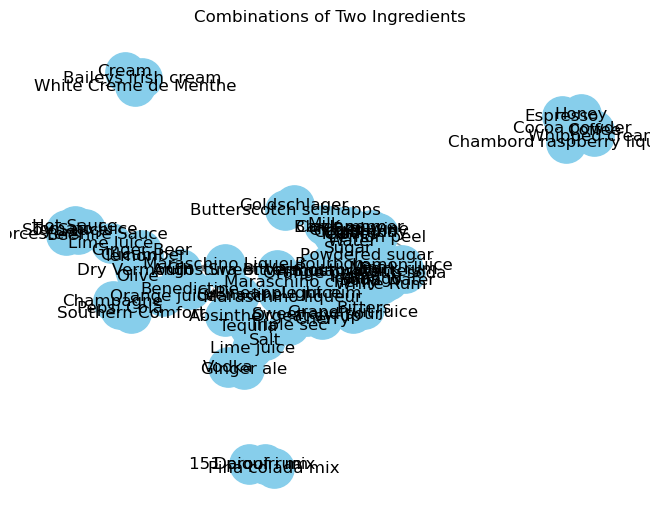

In [143]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add all possible combinations of two ingredients as edges in the graph with edge weights
for list in all_ingredients:
    for pair in itertools.combinations(list, 2):
        ingredient1 = pair[0]
        ingredient2 = pair[1]
        
        # Check if ingredient1 is already in the graph
        if G.has_node(ingredient1):
            found = False
            # Check if ingredient2 is already a connected edge in the graph for ingredient1
            for edge in G.out_edges(ingredient1, data=True):
                if edge[1] == ingredient2:
                    # Increment the weight by 1 if the edge is not new
                    G[ingredient1][ingredient2]['weight'] += 1
                    found = True
                    break
            # If ingredient2 is a new edge for ingredient1, add it with weight 1
            if not found:
                G.add_edge(ingredient1, ingredient2, weight=1)
        else:
            # If ingredient1 is not in the graph, add it with ingredient2 as the connected edge with weight 1
            G.add_edge(ingredient1, ingredient2, weight=1)

        # Check if ingredient2 is already in the graph
        if G.has_node(ingredient2):
            found = False
            # Check if ingredient2 is already a connected edge in the graph for ingredient1
            for edge in G.out_edges(ingredient2, data=True):
                if edge[1] == ingredient1:
                    # Increment the weight by 1 if the edge is not new
                    G[ingredient2][ingredient1]['weight'] += 1
                    found = True
                    break
            # If ingredient1 is a new edge for ingredient2, add it with weight 1
            if not found:
                G.add_edge(ingredient2, ingredient1, weight=1)
        else:
            # If ingredient2 is not in the graph, add it with ingredient1 as the connected edge with weight 1
            G.add_edge(ingredient2, ingredient1, weight=1)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, font_size=12, font_color='black', node_color='skyblue', edge_color='gray')
plt.title('Combinations of Two Ingredients')
plt.show()


In [144]:
# Get a list of all nodes in the graph
# nodes_list = list(G.nodes())

print("List of Nodes: ", G.nodes())

List of Nodes:  ['Espresso', 'Honey', 'Cocoa powder', 'Light rum', 'Lime', 'Sugar', 'Mint', 'Soda water', 'Champagne', 'Orange juice', 'Orgeat syrup', 'Triple sec', 'Sweet and sour', 'Cherry', 'Gin', 'Dry Vermouth', 'Olive', 'Beer', 'Tomato Juice', 'Lime Juice', 'Hot Sauce', 'Worcestershire Sauce', 'Soy Sauce', 'Sweet Vermouth', 'Bourbon', 'Angostura bitters', 'Ice', 'Maraschino cherry', 'Orange peel', 'Tequila', 'Lime juice', 'Salt', 'Powdered sugar', 'Water', 'Southern Comfort', 'Pepsi Cola', 'Maraschino Liqueur', 'Angostura Bitters', 'Absinthe', 'Grenadine', '151 proof rum', 'Pina colada mix', 'Daiquiri mix', 'Vodka', 'Ginger ale', 'Cloves', 'Cinnamon', 'Lemon peel', 'Red wine', 'Brandy', 'Tea', 'Ginger', 'Cardamom', 'Black pepper', 'Milk', 'Ginger Beer', 'Cucumber', 'lemon', 'Coffee', 'Chambord raspberry liqueur', 'Whipped cream', 'Mango', 'White Rum', 'Soda Water', 'Lemon juice', 'Dark rum', 'Club soda', 'Benedictine', 'Baileys irish cream', 'White Creme de Menthe', 'Cream', 'Pine

In [145]:
# Get the largest connected component
largest_cc = max(nx.strongly_connected_components(G), key=len)

# Create a subgraph containing only the nodes and edges in the largest connected component
connected_nodes = G.subgraph(largest_cc)

# Print the nodes in the largest connected component
print("Nodes in the Largest Connected Component: ", connected_nodes.nodes())

Nodes in the Largest Connected Component:  ['Light rum', 'Lime', 'Sugar', 'Mint', 'Soda water', 'Champagne', 'Orange juice', 'Orgeat syrup', 'Triple sec', 'Sweet and sour', 'Cherry', 'Gin', 'Dry Vermouth', 'Olive', 'Beer', 'Tomato Juice', 'Lime Juice', 'Hot Sauce', 'Worcestershire Sauce', 'Soy Sauce', 'Sweet Vermouth', 'Bourbon', 'Angostura bitters', 'Ice', 'Maraschino cherry', 'Orange peel', 'Tequila', 'Lime juice', 'Salt', 'Powdered sugar', 'Water', 'Southern Comfort', 'Pepsi Cola', 'Maraschino Liqueur', 'Angostura Bitters', 'Absinthe', 'Grenadine', 'Vodka', 'Ginger ale', 'Cloves', 'Cinnamon', 'Lemon peel', 'Red wine', 'Brandy', 'Tea', 'Ginger', 'Cardamom', 'Black pepper', 'Milk', 'Ginger Beer', 'Cucumber', 'lemon', 'Mango', 'White Rum', 'Soda Water', 'Lemon juice', 'Dark rum', 'Club soda', 'Benedictine', 'Pineapple juice', 'Maraschino liqueur', 'Grapefruit juice', 'Bitters', 'Goldschlager', 'Butterscotch schnapps']


In [146]:
# nodes = connected_nodes.nodes()
# max_flow = 0
# max_start = ''
# max_end = ''
# max_flow_dict = {}

# # Perform network flow analysis for every possible combination of start and end nodes
# for start_node in nodes:
#     for end_node in nodes:
#         if start_node != end_node:
#             # Use the Ford-Fulkerson algorithm to find the maximum flow in the graph
#             flow_value, flow_dict = nx.maximum_flow(connected_nodes, start_node, end_node)

#             if flow_value > max_flow:
#                 max_flow = flow_value
#                 max_start = start_node
#                 max_end = end_node
#                 max_flow_dict = flow_dict

# print("Start Node: " + max_start)
# print("End Node: " + max_end)
# print("Max Flow: " + str(max_flow))
# print("Flow Dict: " + str(max_flow_dict))
# print("---------------")

#### Get non-zero flows

In [147]:
# non_zero_flows = {}  # Dictionary to store non-zero flow values and keys

# # Iterate through the flow_dict
# for source_node in max_flow_dict:
#     for target_node, flow_value in max_flow_dict[source_node].items():
#         if flow_value > 0:
#             # Add non-zero flow value and keys to the dictionary
#             non_zero_flows[(source_node, target_node)] = flow_value

# # Extract keys and non-zero flow values
# keys = non_zero_flows.keys()
# values = non_zero_flows.values()

# # Print keys and non-zero flow values
# print("Keys:")
# print(keys)
# print("Non-zero Flow Values:")
# print(values)


### Maximum path instead

In [148]:
# Compute all maximum-valued paths in the graph
max_valued_paths = nx.all_pairs_dijkstra_path(connected_nodes, weight='weight')

In [149]:
print(max_valued_paths)

<generator object all_pairs_dijkstra_path at 0x000002790E7AA0B0>


In [150]:
# Sort maximum-valued paths by their values in descending order
sorted_paths = sorted(max_valued_paths, key=lambda x: max(nx.path_weight(G, p, weight='weight') for p in x[1].values()), reverse=False)

# # Print all maximum-valued paths and their values
# for source_node, paths in sorted_paths:
#     print("Maximum-Valued Paths from", source_node, ":")
#     for target_node, path in paths.items():
#         value = nx.path_weight(G, path, weight='weight')
#         print("  To", target_node, ": Path =", path, ", Value =", value)

In [151]:
# Find the maximum value among the values of all paths
max_value = max(max(nx.path_weight(connected_nodes, p, weight='weight') for p in paths.values()) for _, paths in sorted_paths)
# print(max_value)

# Find the path with the largest value among all maximum-valued paths
# largest_value = 0
largest_value_path = []

# Print all maximum-valued paths and their values
for source_node, paths in sorted_paths:
    for target_node, path in paths.items():
        value = nx.path_weight(G, path, weight='weight')
        if value == max_value:
            print("Path =", path, ", Value =", value)
            # largest_value = value
            largest_value_path.append(path)

Path = ['Beer', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Cloves'] , Value = 7
Path = ['Beer', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Cinnamon'] , Value = 7
Path = ['Beer', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Milk', 'Goldschlager'] , Value = 7
Path = ['Beer', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Milk', 'Butterscotch schnapps'] , Value = 7
Path = ['Tomato Juice', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Cloves'] , Value = 7
Path = ['Tomato Juice', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Cinnamon'] , Value = 7
Path = ['Tomato Juice', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Milk', 'Goldschlager'] , Value = 7
Path = ['Tomato Juice', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Milk', 'Butterscotch schnapps'] , Value = 7
Path = ['Hot Sauce', 'Lime Juice', 'Gin', 'Sweet Vermouth', 'Bourbon', 'Water', 'Cloves'] , Value = 7
Path = ['Hot

In [153]:
import random

# Pick a random element from the list
random_large_path = random.choice(largest_value_path)
print("Path with the largest value among all maximum-valued paths:")
print("Path =", random_large_path, ", Value =", max_value)

Path with the largest value among all maximum-valued paths:
Path = ['Cloves', 'Water', 'Bourbon', 'Sweet Vermouth', 'Gin', 'Lime Juice', 'Tomato Juice'] , Value = 7


maybe get a recipe that consists of the most commonly occuring ingredients from the max_path cocktails

In [159]:
import collections
ingredient_count = collections.defaultdict(int)

for x in largest_value_path:
    for ingredient in x:
        ingredient_count[ingredient] += 1
    
sorted_ingredients = sorted(ingredient_count.items(), key=lambda x:x[1])
print(sorted_ingredients)

[('Beer', 8), ('Tomato Juice', 8), ('Hot Sauce', 8), ('Worcestershire Sauce', 8), ('Soy Sauce', 8), ('Cloves', 10), ('Cinnamon', 10), ('Goldschlager', 10), ('Butterscotch schnapps', 10), ('Milk', 20), ('Lime Juice', 40), ('Gin', 40), ('Sweet Vermouth', 40), ('Bourbon', 40), ('Water', 40)]


In [ ]:
num_ingred = 5